In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import functools
from matplotlib_venn import venn2
import attila_utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Summary

Finding the earliest genes that drive Alzheimer's disease(AD).  It is expected (by Madhav) that those early genes tend to be contained in the differentially expressed gene sets (DEGs) emerging from comparing APOE3 vs APOE4 carrying iPSCs.  We have been working with three of such DEG sets:
1. 'APOE3-4 DE neuron'
1. 'APOE3-4 DE astrocyte'
1. 'APOE3-4 DE microglia'

However, it may also be expected that these gene sets also contain genes involved in later stages of AD.  To isolate the early genes from the late genes we define late AD genes in terms of other gene sets below such as 'knowledge', 'TWAS2+',...

We actually define two versions of late AD genes: 'late AD genes v1' is a subset of 'late AD genes v2', therefore subtracting v2 from any of the APOE3-4 DE sets is expected to result in a smaller set than subtracting v2 does.

What we see below is that subtracting even 'late AD genes v2' from some APOE3-4 DE set results in a gene set that is only slightly smaller than the APOE3-4 DE set.

## Preparations

In [2]:
fpath_gset = {\
'knowledge': '../../results/2021-07-01-high-conf-ADgenes/AD-genes-knowledge-extended',
'TWAS2+': '../../results/2021-07-01-high-conf-ADgenes/AD-genes-TWAS2plus',
'agora2+': '../../resources/agora/AD-genes-agora-2plus-nominations',
'agora': '../../resources/agora/AD-genes-agora',
'DESudhir': '../../resources/CMap/sudhir-varma/up-down.genes-noNAs',
'AD DE APOE3-APOE3': '../../results/2021-11-28-ad-de-genes-apoe/ad-de-genes-apoe3-apoe3',
'AD DE APOE4-APOE4': '../../results/2021-11-28-ad-de-genes-apoe/ad-de-genes-apoe4-apoe4',
'APOE3-4 DE neuron': '../../results/2021-12-08-apoe-de-genes-tunahan/Neuron-apoe-de',
'APOE3-4 DE astrocyte': '../../results/2021-12-08-apoe-de-genes-tunahan/Astrocyte-apoe-de',
'APOE3-4 DE microglia': '../../results/2021-12-08-apoe-de-genes-tunahan/Microglia-like-apoe-de',
'rMTA-APOE3-4': '../../results/2022-02-25-dilara-rmta-geneset/rmta-apoe3-apoe4',
             }

In [3]:
def read_gset(fpath):
    with open(fpath) as f:
        gset = set([s.strip() for s in f.readlines()])
    return(gset)

gset = {name: read_gset(fpath) for name, fpath in fpath_gset.items()}

## Early and late AD genes

In [4]:
lates = ['knowledge', 'TWAS2+', 'agora2+', 'AD DE APOE3-APOE3', 'AD DE APOE4-APOE4']
late_genes = functools.reduce(lambda a, b: a.union(b), [gset[k] for k in lates])
lates_v2 = ['knowledge', 'TWAS2+', 'agora', 'DESudhir', 'AD DE APOE3-APOE3', 'AD DE APOE4-APOE4']
late_genes_v2 = functools.reduce(lambda a, b: a.union(b), [gset[k] for k in lates_v2])
earlies = ['APOE3-4 DE neuron', 'APOE3-4 DE astrocyte', 'APOE3-4 DE microglia']
early_genes = functools.reduce(lambda a, b: a.union(b), [gset[k] for k in earlies])
print(len(late_genes), 'late AD genes')
print(len(late_genes_v2), 'late AD genes v2')
print(len(early_genes), 'APOE3-4 DE genes')

583 late AD genes
1288 late AD genes v2
368 APOE3-4 DE genes


['named-figure/APOE3-4-DE-minus-late.png',
 'named-figure/APOE3-4-DE-minus-late.pdf']

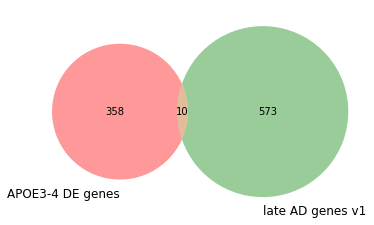

In [5]:
def my_venn2(late_g, label2):
    partition = dict()
    partition['10'] = early_genes.difference(late_g)
    partition['01'] = late_g.difference(early_genes)
    partition['11'] = early_genes.intersection(late_g)
    subsets = {k: len(v) for k, v in partition.items()}
    fig, ax = plt.subplots()
    venn2(subsets=subsets, set_labels=('APOE3-4 DE genes', label2), ax=ax)
    return((fig, ax))

fig, ax = my_venn2(late_genes, 'late AD genes v1')
attila_utils.savefig(fig, 'APOE3-4-DE-minus-late')

['named-figure/APOE3-4-DE-minus-late-v2.png',
 'named-figure/APOE3-4-DE-minus-late-v2.pdf']

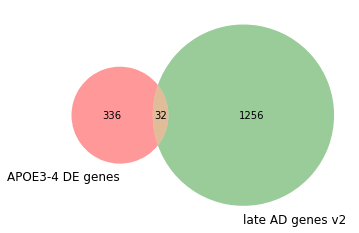

In [6]:
fig, ax = my_venn2(late_genes_v2, 'late AD genes v2')
attila_utils.savefig(fig, 'APOE3-4-DE-minus-late-v2')

['named-figure/APOE3-4-DE-minus-late-celltype.png',
 'named-figure/APOE3-4-DE-minus-late-celltype.pdf']

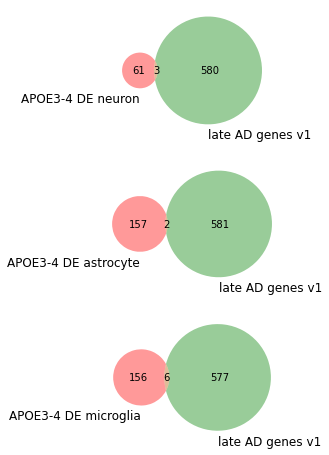

In [7]:
def my_venn2_celltype(early, ax):
    partition = dict()
    partition['10'] = gset[early].difference(late_genes)
    partition['01'] = late_genes.difference(gset[early])
    partition['11'] = gset[early].intersection(late_genes)
    subsets = {k: len(v) for k, v in partition.items()}
    venn2(subsets=subsets, set_labels=(early, 'late AD genes v1'), ax=ax)

fig, ax = plt.subplots(len(earlies), 1, figsize=(8, 8))
for early, axi in zip(earlies, ax):
    my_venn2_celltype(early, axi)

attila_utils.savefig(fig, 'APOE3-4-DE-minus-late-celltype')

In [8]:
%connect_info

{
  "shell_port": 49518,
  "iopub_port": 49519,
  "stdin_port": 49520,
  "control_port": 49522,
  "hb_port": 49521,
  "ip": "127.0.0.1",
  "key": "0005d1e0-000e8df4790c650c30b16035",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": ""
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-02a76223-3869-47f6-9382-343ccfbaa475.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.
